# Introduction Code for Question (2)


## Initial Data Cleaning And Analysing for Q (2) 

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

## (1) Reading all the datasets neccessary

In [2]:
#extracting the three latest saved datasets from the Harvard Dataverse
dt_2008 = pd.read_csv (r"C:\Users\user\Downloads\Programming\2008.csv")
dt_2007 = pd.read_csv (r"C:\Users\user\Desktop\progdata\data2007.csv")
dt_2006 = pd.read_csv (r"C:\Users\user\Desktop\progdata\data2006.csv")

airportsdt = pd.read_csv (r"C:\Users\user\Downloads\Programming\airports.csv") 
carriersdt = pd.read_csv (r"C:\Users\user\Downloads\Programming\carriers.csv")
planedatadt = pd.read_csv (r"C:\Users\user\Downloads\Programming\plane-data.csv")
# reading the additional datasets required for the question

In [3]:
#see and compare the data shapes for each year 
print(dt_2008.shape) #year 2008
print(dt_2007.shape) #year 2007
print(dt_2006.shape) #year 2006

(1048575, 29)
(7453215, 29)
(7141922, 29)


In [4]:
#check for missing datapoints in 2008.csv (due to the small size compared to other years)
datasets = [dt_2008, dt_2007, dt_2006]
years = [2008, 2007, 2006]

for i, dataset in enumerate(datasets):
    unique_values = dataset[['Month', 'DayofMonth']].nunique()
    print(f"Unique values for dataset {years[i]}:")
    print(unique_values)
    print()

Unique values for dataset 2008:
Month          2
DayofMonth    31
dtype: int64

Unique values for dataset 2007:
Month         12
DayofMonth    31
dtype: int64

Unique values for dataset 2006:
Month         12
DayofMonth    31
dtype: int64



 - 2008 Dataset only has 2 months in the dataset which results in less information for us to analyze so going forward with the question we dont use the 2008 Dataset.

## (2) Combining 2006 and 2007 Datasets into one data set

In [5]:
merged_dt = pd.concat([dt_2006, dt_2007])
merged_dt.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


- dropping duplicated rows in the merged dataset

In [6]:
merged_dt.drop_duplicates(inplace=True)

- saving merged data set with duplicate rows removed

In [7]:
merged_dt.to_csv(r"C:\Users\user\Desktop\progdata\mergedata2006n2007.csv",index=False)

## (3) Understanding the Data

In [8]:
dt_2006.shape

(7141922, 29)

In [9]:
dt_2007.shape

(7453215, 29)

In [10]:
airportsdt.shape

(3376, 7)

In [11]:
carriersdt.shape

(1491, 2)

In [12]:
planedatadt.shape

(5029, 9)

In [13]:
airportsdt.columns

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')

In [14]:
merged_dt.shape

(14595103, 29)

In [15]:
merged_dt.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
carriersdt.columns

Index(['Code', 'Description'], dtype='object')

In [17]:
planedatadt.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [18]:
airportsdt.dtypes

iata        object
airport     object
city        object
state       object
country     object
lat        float64
long       float64
dtype: object

In [19]:
carriersdt.dtypes

Code           object
Description    object
dtype: object

In [20]:
planedatadt.dtypes

tailnum           object
type              object
manufacturer      object
issue_date        object
model             object
status            object
aircraft_type     object
engine_type       object
year             float64
dtype: object

In [21]:
merged_dt.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

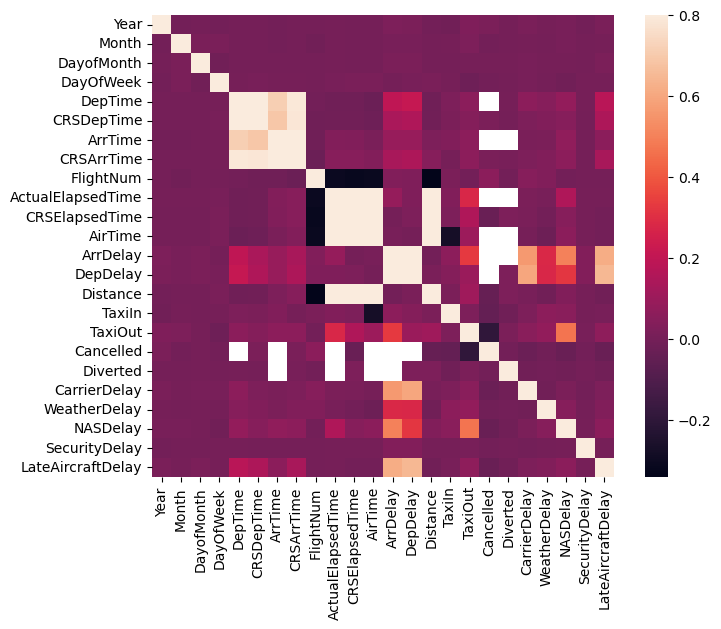

In [22]:
# Selecting only numeric columns for the correlation heat map
num_col = merged_dt.select_dtypes(include=['number'])
corrmat = num_col.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

 - The correlation matrix helps us understand how different variables in our dataset are related to each other. It shows us if there's a linear relationship between them, meaning one variable can be predicted from another. By analyzing this matrix, we can identify which variables might be redundant or exhibit multicollinearity, where they're highly correlated with each other.

## (4)  Exploratory Data Analiysis (EDA)

#### We focus on three main flight operational outcomes:
    (1) Delayed Flights
    (2) Cancelled Flights
    (3) Diverted Flights

In [23]:
# Creating 'DepartureDate' new column to show year, month and dayofmonth together in 1 column
merged_dt['Departure_Date_'] = pd.to_datetime(merged_dt['Year']*10000 + merged_dt['Month']*100 + merged_dt['DayofMonth'], format='%Y%m%d')
print(merged_dt['Departure_Date_'])

0         2006-01-11
1         2006-01-11
2         2006-01-11
3         2006-01-11
4         2006-01-11
             ...    
7453210   2007-12-15
7453211   2007-12-15
7453212   2007-12-15
7453213   2007-12-15
7453214   2007-12-15
Name: Departure_Date_, Length: 14595103, dtype: datetime64[ns]


In [24]:
outcome_dataset = merged_dt.copy()  
# Renaming the dataset to 'outcome_dataset'

conditions = [
    (outcome_dataset['ArrDelay'] <= 15),
    (outcome_dataset['ArrDelay'] >= 15) & (outcome_dataset['ArrDelay'] < 60),
    (outcome_dataset['ArrDelay'] >= 60),
    (outcome_dataset['Diverted'] == 1),
    (outcome_dataset['Cancelled'] == 1)
]

choices = [0, 1, 2, 3, 4]
outcome_dataset['Flight_Outcome'] = np.select(conditions, choices)
# Creating 'Flight_Outcome' column based on conditions
outcome_dataset['CancellationCode'] = outcome_dataset['CancellationCode'].map({'A': 0, 'B': 1, 'C': 2})
# Mapping 'CancellationCode' to numeric values to make it easier with the plots

In [25]:
columns_to_drop = [ "Year", "DayofMonth", "DepTime", "DepDelay",
                   "ArrTime", "CRSArrTime", "ActualElapsedTime", "CRSElapsedTime",
                   "Diverted", "Cancelled", "Distance", "FlightNum", "TailNum"]
outcome_dataset.drop(columns=columns_to_drop, inplace=True)

- To simplify our analysis and make our dataset more manageable, we'll remove some of these redundant variables and create new ones. This will help us focus on the most relevant aspects of our data and avoid unnecessary complexity.

### - Flight_Outcome represents whether the flight was;
    on time - (0)
    slightly delayed  - (1) 
    highly delayed - (2) 
    diverted - (3) 
    cancelled - (4)

- (0, 1, 2) are based on delayed flights outcome under the flight operations

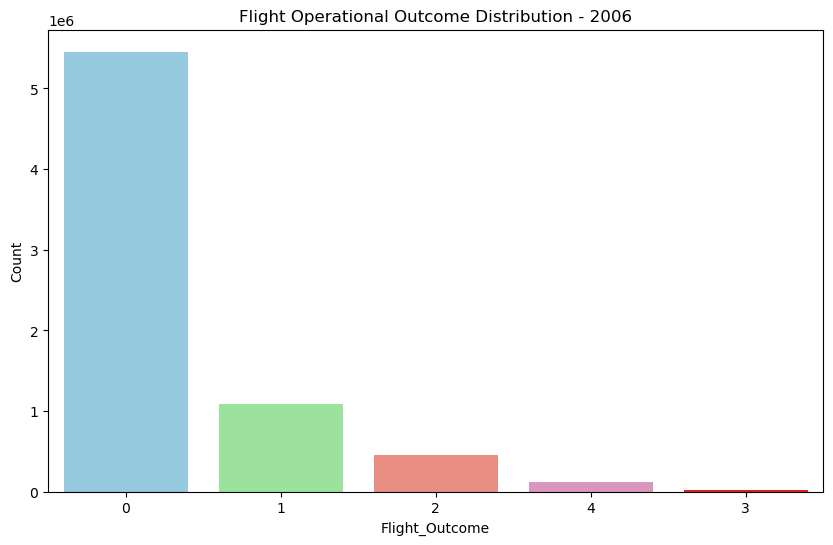

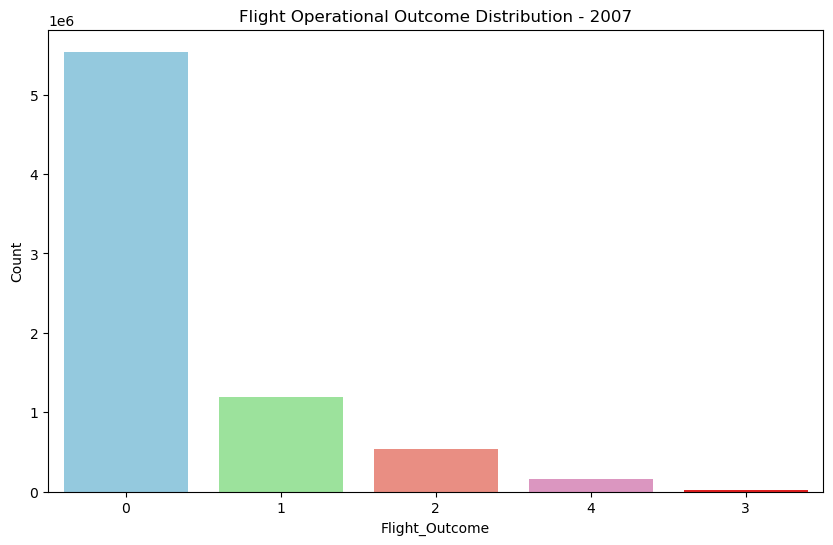

In [26]:
data_2006 = outcome_dataset[outcome_dataset['Departure_Date_'].dt.year == 2006]
data_2007 = outcome_dataset[outcome_dataset['Departure_Date_'].dt.year == 2007]
# Seperating data for 2006 and 2007
plt.figure(figsize=(10, 6))
sns.countplot(x='Flight_Outcome', data=data_2006, order=data_2006['Flight_Outcome'].value_counts().index, palette=['skyblue', 'lightgreen', 'salmon', '#e78ac3', 'red'])
plt.title('Flight Operational Outcome Distribution - 2006')
plt.xlabel('Flight_Outcome')
plt.ylabel('Count')
plt.show()
#above is the plot for 2006 and below for 2007
plt.figure(figsize=(10, 6))
sns.countplot(x='Flight_Outcome', data=data_2007, order=data_2007['Flight_Outcome'].value_counts().index, palette=['skyblue', 'lightgreen', 'salmon', '#e78ac3', 'red'])
plt.title('Flight Operational Outcome Distribution - 2007')
plt.xlabel('Flight_Outcome')
plt.ylabel('Count')
plt.show()

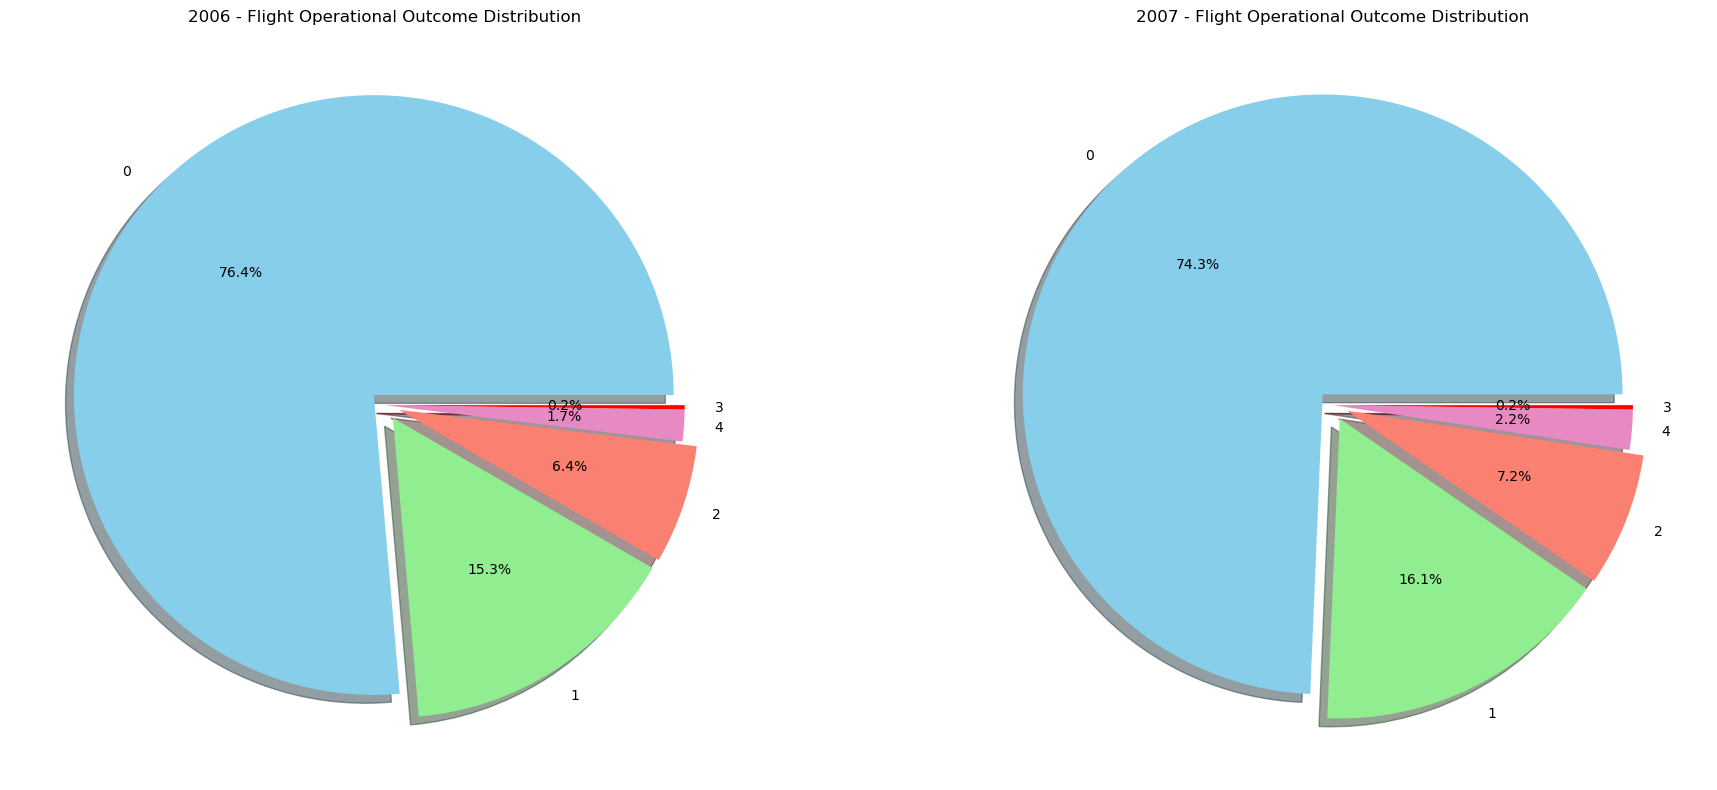

In [27]:
data_2006 = outcome_dataset[outcome_dataset['Departure_Date_'].dt.year == 2006]
data_2007 = outcome_dataset[outcome_dataset['Departure_Date_'].dt.year == 2007]
# Seperating data for 2006 and 2007
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
data_2006['Flight_Outcome'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0, 0], autopct='%1.1f%%', ax=axes[0], shadow=True, colors=['skyblue', 'lightgreen', 'salmon', '#e78ac3', 'red'])
axes[0].set_title('2006 - Flight Operational Outcome Distribution')
axes[0].set_ylabel('')
#above is the plot for 2006 and below for 2007
data_2007['Flight_Outcome'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0, 0], autopct='%1.1f%%', ax=axes[1], shadow=True, colors=['skyblue', 'lightgreen', 'salmon', '#e78ac3', 'red'])
axes[1].set_title('2007 - Flight Operational Outcome Distribution')
axes[1].set_ylabel('')
plt.tight_layout()

- Flights are delayed more in 2007 compared to 2006, with the percentage of flights on-time for 2006 2.1% higher than 2007. Similarly, 2007 has more cancelled flights than 2006 but both years have the same percentages of diverted flights.

## (5) Flight Operational Outcome (Further EDA)

### (i) Delayed Flights EDA

In [28]:
#Checking for any null values in the dataset 
pd.isnull(merged_dt).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316046
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316046
CRSElapsedTime            998
AirTime                316046
ArrDelay               316046
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312420
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
Departure_Date_             0
dtype: int64

 - If we adress NA's now, i it could potentially lead to loss of important datapoints. Let's instead try to see if there is a rational explanation for some of theese, i.e. if a flight is cancelled, then any delay entry shouldn't be possible.

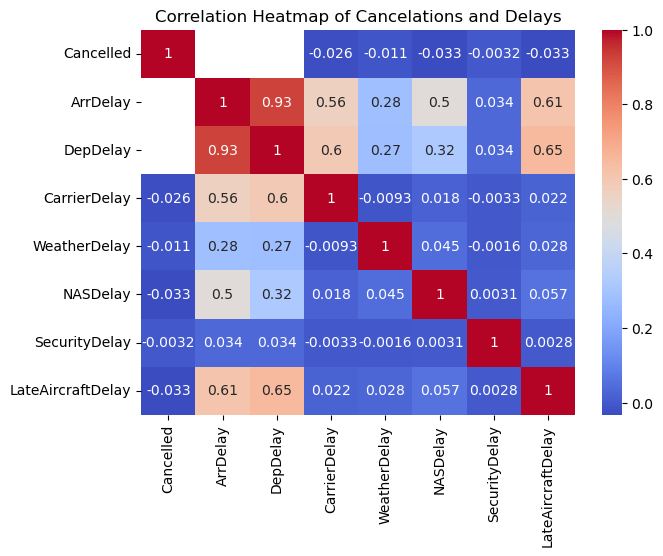

In [29]:
cancelled_dt = merged_dt[['Cancelled', 'ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
plt.figure(figsize=(7,5))  
cancelled_heatmap = sns.heatmap(cancelled_dt.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Cancelations and Delays')  
plt.show()
#Checking whether cancelled flights and delayed flights are correlated

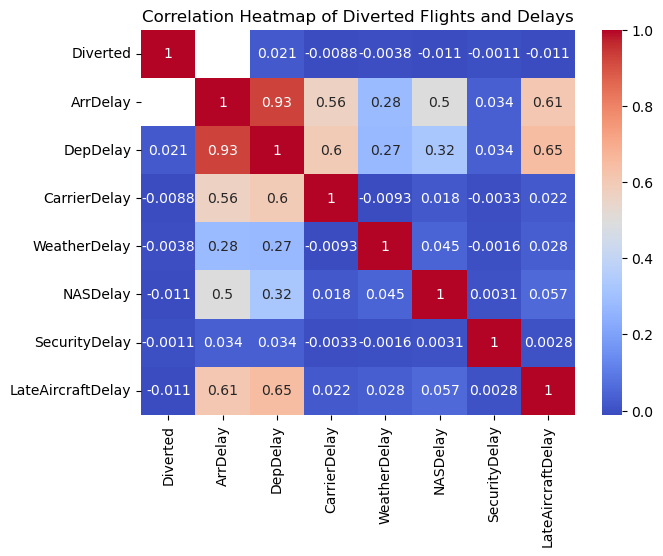

In [30]:
diverted_dt = merged_dt[['Diverted', 'ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
plt.figure(figsize=(7, 5))  
diverted_heatmap = sns.heatmap(diverted_dt.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap of Diverted Flights and Delays')  
plt.show()
#Checking whether diverted flights and delayed flights are correlated

In [31]:
#To analyse this case we further look into the cancelled flights data
cancel_ = cancelled_dt[['Cancelled', 'ArrDelay','DepDelay']]
cancel_=cancel_[cancel_['Cancelled']==1]
# selecting only cancelled flights
print(cancel_)
print(cancel_.isna().sum())

         Cancelled  ArrDelay  DepDelay
11               1       NaN       NaN
52               1       NaN       NaN
70               1       NaN       NaN
74               1       NaN       NaN
99               1       NaN       NaN
...            ...       ...       ...
7453123          1       NaN       NaN
7453124          1       NaN       NaN
7453130          1       NaN       NaN
7453131          1       NaN       NaN
7453199          1       NaN       NaN

[282682 rows x 3 columns]
Cancelled         0
ArrDelay     282682
DepDelay     282682
dtype: int64


 - "As anticipated, when a flight is canceled, there are no delay entries. In fact, the count of NA values for delays matches the row count in the DataFrame. Therefore, it's logical to select data that excludes canceled flights."

In [32]:
#dataframes without cancelled flights.
merged_dt__ = merged_dt[merged_dt['Cancelled']==0] 

#Similarly if a plane is diverted, then arrival delay entry should be impossible.
#remaining NA values corresponds to diverted in the same way as cancelled.
merged_dt__ = merged_dt__[merged_dt__['Diverted']==0]

In [33]:
pd.isnull(merged_dt__).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14279056
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
Departure_Date_             0
dtype: int64

In [34]:
merged_dt__ = pd.merge(merged_dt__, carriersdt,  how='inner', left_on=['UniqueCarrier'], right_on = ['Code'])
merged_dt__.rename(columns={'Description': 'Carrier'}, inplace=True)
merged_dt__['delay'] = merged_dt__['DepDelay'] + merged_dt__['ArrDelay']  
merged_dt__['dep_hour_standard'] = merged_dt__['DepTime'] / 100 * 1.0386100  # Departure standard time column
merged_dt__['Date'] = pd.to_datetime(pd.DataFrame({'year': merged_dt__['Year'],
                                                       'month': merged_dt__['Month'],
                                                       'day': merged_dt__['DayofMonth'], 
                                                       'hour': merged_dt__['dep_hour_standard']}))  

merged_dt__['dep_hour_int'] = (merged_dt__['DepTime'] / 100).astype(int) 
merged_dt__['Date_bin'] = pd.to_datetime(pd.DataFrame({'year': merged_dt__['Year'],
                                                           'month': merged_dt__['Month'],
                                                           'day': merged_dt__['DayofMonth'], 
                                                           'hour': merged_dt__['dep_hour_int']}))  # Date column in bins
merged_dt__.head() 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,Departure_Date_,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,4.0,7.716872,2006-01-11 07:43:00.740280,7,2006-01-11 07:00:00
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-5.0,10.936563,2006-01-11 10:56:11.627880,10,2006-01-11 10:00:00
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-23.0,19.889381,2006-01-11 19:53:21.773400,19,2006-01-11 19:00:00
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-10.0,18.206833,2006-01-11 18:12:24.599880,17,2006-01-11 17:00:00
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-8.0,8.558146,2006-01-11 08:33:29.327040,8,2006-01-11 08:00:00


In [35]:
delay_dt = merged_dt__[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
               'LateAircraftDelay','delay']]
#details of delay related columns are extracted
delay_dt.rename(columns={'ArrDelay': 'Arrival delay', 'DepDelay': 'Departure Delay',
                         'CarrierDelay':'Carrier Delay','WeatherDelay':'Weather Delay',
                         'NASDelay': 'NAS Delay', 'SecurityDelay': 'Security Delay',
                         'LateAircraftDelay':'Late Aircraft Delay',
                         'delay':'Total Delay'}, inplace=True)
delay_dt = delay_dt.describe().T 
delay_info_table = delay_dt.rename_axis('Delay Type').reset_index()  
delay_info_table.set_index('Delay Type', inplace=True)  
delay_info_table.columns.name = None  

delay_info_table['count'] = delay_info_table['count'].map('{:,.0f}'.format)
delay_info_table['mean'] = delay_info_table['mean'].map('{:.2f}'.format)
delay_info_table['std'] = delay_info_table['std'].map('{:.2f}'.format)
delay_info_table['min'] = delay_info_table['min'].map('{:.2f}'.format)
delay_info_table['25%'] = delay_info_table['25%'].map('{:.2f}'.format)
delay_info_table['50%'] = delay_info_table['50%'].map('{:.2f}'.format)
delay_info_table['75%'] = delay_info_table['75%'].map('{:.2f}'.format)
delay_info_table['max'] = delay_info_table['max'].map('{:.2f}'.format)
# Formating the columns for better readability
delay_info_table

C:\Users\user\AppData\Local\Temp\ipykernel_13112\1651173480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_dt.rename(columns={'ArrDelay': 'Arrival delay', 'DepDelay': 'Departure Delay',


,count,mean,std,min,25%,50%,75%,max
Delay Type,,,,,,,,
Arrival delay,"14,279,057",9.45,38.00,-592.00,-9.00,-1.00,13.00,2598.00
Departure Delay,"14,279,057",10.72,34.79,-1200.00,-4.00,0.00,10.00,2601.00
Carrier Delay,"14,279,057",3.72,20.08,0.00,0.00,0.00,0.00,2580.00
Weather Delay,"14,279,057",0.74,9.19,0.00,0.00,0.00,0.00,1429.00
NAS Delay,"14,279,057",3.77,16.08,0.00,0.00,0.00,0.00,1392.00
Security Delay,"14,279,057",0.03,1.20,0.00,0.00,0.00,0.00,382.00
Late Aircraft Delay,"14,279,057",4.92,20.81,0.00,0.00,0.00,0.00,1366.00
Total Delay,"14,279,057",20.17,71.43,-1196.00,-12.00,-1.00,22.00,5199.00


 - exploring departure Delay and arrival delay maximum outliers

In [36]:
exp_del = merged_dt__[['Carrier','TailNum','DepDelay','ArrDelay']]
outlier_del = exp_del[(exp_del["ArrDelay"] >2000) & (exp_del["DepDelay"] >2000)]
outlier_del

,Carrier,TailNum,DepDelay,ArrDelay
11343959,Northwest Airlines Inc.,N329NW,2601.0,2598.0


In [37]:
merged_dt__ = merged_dt__[merged_dt__['TailNum'] != 'N329NW']
merged_dt__

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,Departure_Date_,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,4.0,7.716872,2006-01-11 07:43:00.740280,7,2006-01-11 07:00:00
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-5.0,10.936563,2006-01-11 10:56:11.627880,10,2006-01-11 10:00:00
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-23.0,19.889381,2006-01-11 19:53:21.773400,19,2006-01-11 19:00:00
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-10.0,18.206833,2006-01-11 18:12:24.599880,17,2006-01-11 17:00:00
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,2006-01-11,US,US Airways Inc. (Merged with America West 9/05...,-8.0,8.558146,2006-01-11 08:33:29.327040,8,2006-01-11 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279052,2007,12,31,1,2121.0,1630,2218.0,1740,9E,2838,...,0,278,2007-12-31,9E,Pinnacle Airlines Inc.,569.0,22.028918,2007-12-31 22:01:44.105160,21,2007-12-31 21:00:00
14279053,2007,12,31,1,1241.0,1235,1341.0,1340,9E,5773,...,0,0,2007-12-31,9E,Pinnacle Airlines Inc.,7.0,12.889150,2007-12-31 12:53:20.940360,12,2007-12-31 12:00:00
14279054,2007,12,31,1,613.0,620,712.0,735,9E,5912,...,0,0,2007-12-31,9E,Pinnacle Airlines Inc.,-30.0,6.366679,2007-12-31 06:22:00.045480,6,2007-12-31 06:00:00
14279055,2007,12,31,1,711.0,715,930.0,923,9E,5615,...,0,0,2007-12-31,9E,Pinnacle Airlines Inc.,3.0,7.384517,2007-12-31 07:23:04.261560,7,2007-12-31 07:00:00


In [38]:
delay_carrier=merged_dt__[['Carrier']].groupby("Carrier").count() #carrier column and group by count
delay_carrier['fligts']=merged_dt__['Carrier'].value_counts() #total flights
delay_carrier = delay_carrier.reset_index(drop=False) 
#create carrier total flights dataset

delay_carrier2=(merged_dt__[merged_dt__['delay']>0]['Carrier'].value_counts()) #delayed
delay_carrier2=delay_carrier2.to_frame(name=('total delays')) 
delay_carrier2.index.name='Carrier' 
delay_carrier2=delay_carrier2.reset_index(drop=False) 
#carrier total delays dataset

delay_merge = delay_carrier.merge(delay_carrier2[['Carrier','total delays']],
                                  how='left',left_on='Carrier',right_on='Carrier')
#merge to carrier delay dataset
delay_merge['percentage']=(delay_merge['total delays']/delay_merge['fligts']) #% delay column
# Replace the long name with the shortened version given below to make it easier
delay_merge['Carrier'] = delay_merge['Carrier'].str.replace('US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)', 'US Airways Inc.')
delay_merge 

,Carrier,fligts,total delays,percentage
0,ATA Airlines d/b/a ATA,19365,9880,0.510199
1,AirTran Airways Corporation,495076,219991,0.444358
2,Alaska Airlines Inc.,313606,150053,0.478476
3,Aloha Airlines Inc.,80584,22151,0.274881
4,American Airlines Inc.,1245605,592462,0.475642
5,American Eagle Airlines Inc.,1045006,490341,0.469223
6,Atlantic Southeast Airlines,542456,308245,0.568240
7,Comair Inc.,495066,244520,0.493914
8,Continental Air Lines Inc.,625820,296066,0.473085
9,Delta Air Lines Inc.,965602,437744,0.453338


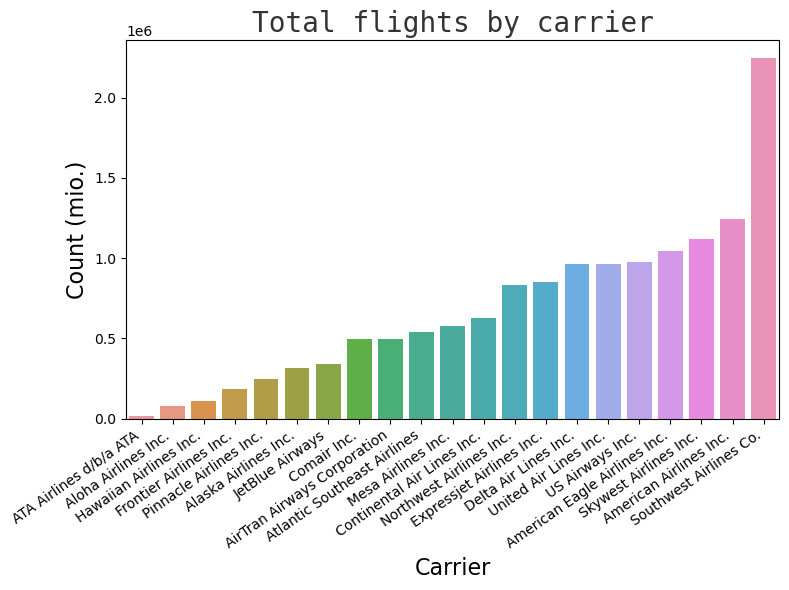

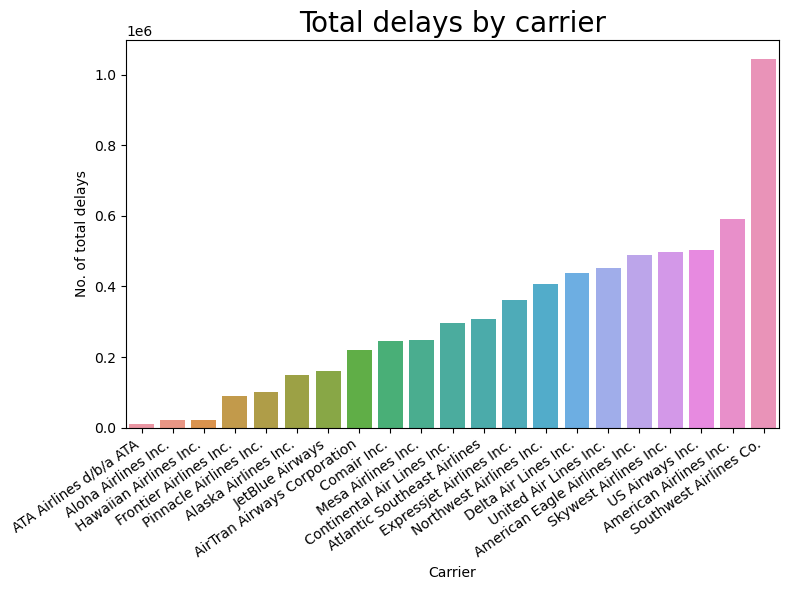

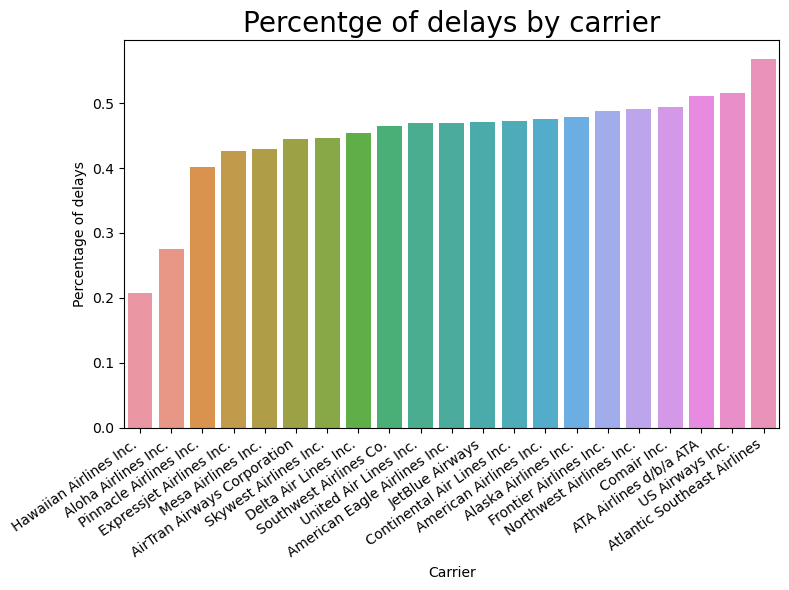

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delay_merge.sort_values(by='fligts'),ax=ax, x=('Carrier'), y=('fligts'))
ax.set_title('Total flights by carrier',fontsize = 20, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") 
ax.set_xlabel('Carrier',fontsize = 16)
ax.set_ylabel("Count (mio.)",fontsize = 16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('EDA_plot4.png', bbox_inches='tight') 
plt.show() 
#plotting total flights by carrier

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delay_merge.sort_values(by='total delays'),ax=ax, x=('Carrier'), y=('total delays'))
ax.set_title('Total delays by carrier', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") 
ax.set_xlabel('Carrier')
ax.set_ylabel('No. of total delays')
plt.tight_layout() 
plt.show() 
#plotting total delays by carrier

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delay_merge.sort_values(by='percentage'),ax=ax, x=('Carrier'), y=('percentage'))
ax.set_title('Percentge of delays by carrier', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
ax.set_xlabel('Carrier')
ax.set_ylabel('Percentage of delays')
plt.tight_layout() 
plt.show() 
#plotting percentage delays by carrier

In [40]:
#merge df with airports, origin 
delay_by_airport = pd.merge(merged_dt__, airportsdt,  how='inner', left_on=['Origin'], right_on = ['iata'])
delay_by_airport 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Date,dep_hour_int,Date_bin,iata,airport,city,state,country,lat,long
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,2006-01-11 07:43:00.740280,7,2006-01-11 07:00:00,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,2006-01-11 10:56:11.627880,10,2006-01-11 10:00:00,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,2006-01-11 19:53:21.773400,19,2006-01-11 19:00:00,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,2006,1,12,4,1810.0,1820,1951.0,2003,US,1638,...,2006-01-12 18:47:55.827600,18,2006-01-12 18:00:00,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
4,2006,1,12,4,1050.0,1020,1230.0,1203,US,1662,...,2006-01-12 10:54:19.458000,10,2006-01-12 10:00:00,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14276347,2007,11,2,5,1652.0,1700,1746.0,1800,9E,5601,...,2007-11-02 17:09:28.213920,16,2007-11-02 16:00:00,BJI,Bemidji-Beltrami County,Bemidji,MN,USA,47.509424,-94.933723
14276348,2007,11,29,4,1339.0,1315,1442.0,1445,9E,5970,...,2007-11-29 13:54:25.156440,13,2007-11-29 13:00:00,PIR,Pierre Regional,Pierre,SD,USA,44.382677,-100.285965
14276349,2007,12,3,1,1045.0,1000,1442.0,1400,9E,5998,...,2007-12-03 10:51:12.508200,10,2007-12-03 10:00:00,PIR,Pierre Regional,Pierre,SD,USA,44.382677,-100.285965
14276350,2007,12,7,5,1449.0,1315,1602.0,1445,9E,5970,...,2007-12-07 15:02:58.052040,14,2007-12-07 14:00:00,PIR,Pierre Regional,Pierre,SD,USA,44.382677,-100.285965


- We only choose the top 20 airports with the most number of flights in order becuase there is a large number of airpots to consider.

In [42]:
#create airport total flights dataset
delayairport1 = delay_by_airport[['airport','iata']].groupby('airport').count()
delayairport1.rename(columns={'iata': 'flights'}, inplace=True)
delayairport1 = delayairport1.sort_values(by=['flights'], ascending=False)
delayairport1 = delayairport1.reset_index(drop=False)

#carrier total delays dataset
delayairport2=(delay_by_airport[delay_by_airport['delay']>0]['airport'].value_counts()) #delayed
delayairport2=delayairport2.to_frame(name=('total delays')) 
delayairport2.index.name='airport' #set index name
delayairport2=delayairport2.reset_index(drop=False) 

#merge to carrier delay dataset
delayairport_merge = delayairport1.merge(delayairport2[['airport','total delays']],
                                  how='left',left_on='airport',right_on='airport')
delayairport_merge['percentage']=(delayairport_merge['total delays']/delayairport_merge['flights']) #% delay column
delayairport_merge = delayairport_merge.head(20)
delayairport_merge 

,airport,flights,total delays,percentage
0,William B Hartsfield-Atlanta Intl,806540,445545.0,0.552415
1,Chicago O'Hare International,718486,385298.0,0.536264
2,Dallas-Fort Worth International,582481,290398.0,0.498554
3,Los Angeles International,464271,215976.0,0.465194
4,Denver Intl,464218,233106.0,0.502148
5,Phoenix Sky Harbor International,420816,204309.0,0.485507
6,George Bush Intercontinental,418974,202500.0,0.483324
7,McCarran International,364143,187298.0,0.514353
8,Newark Intl,301221,158748.0,0.527015
9,Detroit Metropolitan-Wayne County,298648,164189.0,0.549774


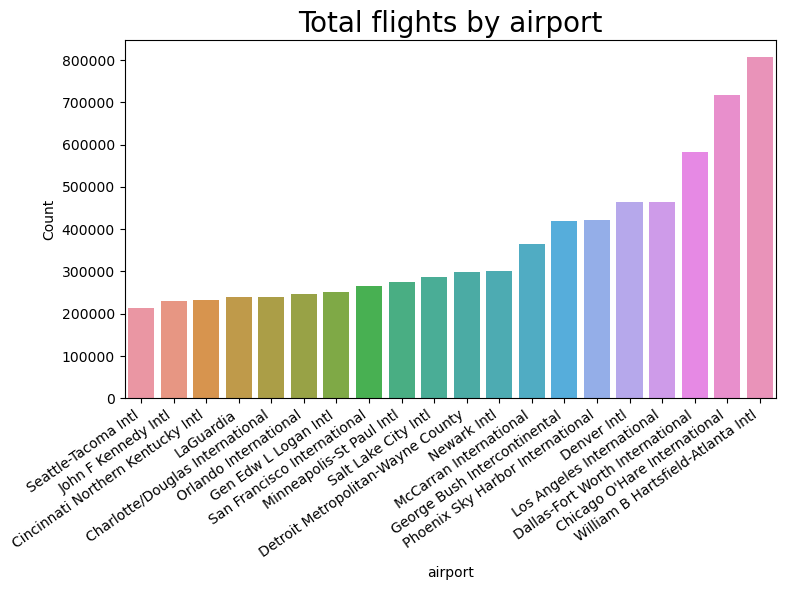

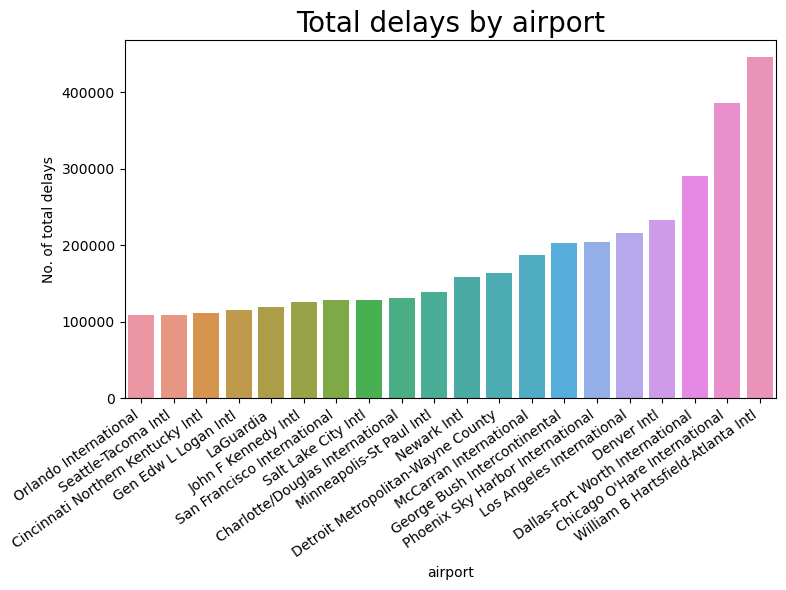

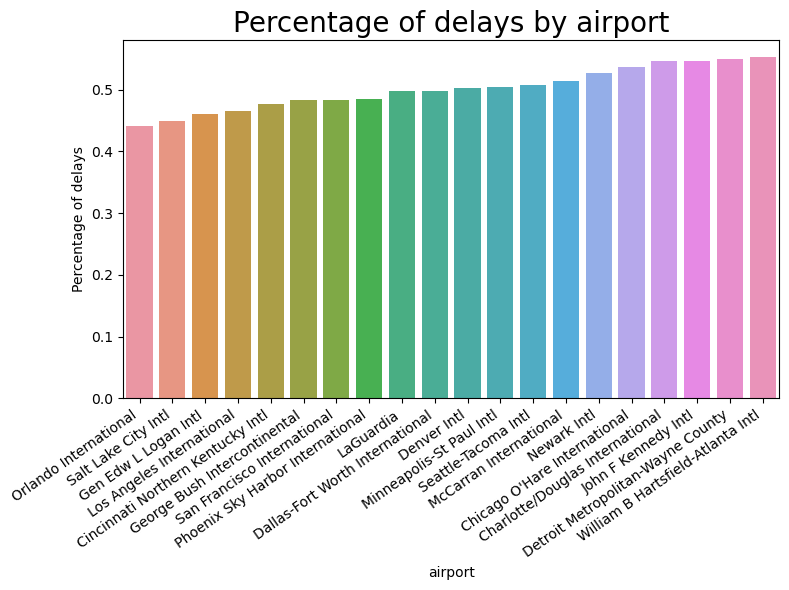

In [43]:
#total flights 
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delayairport_merge.sort_values(by='flights'),ax=ax, x=('airport'), y=('flights'))
ax.set_title('Total flights by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") 
ax.set_xlabel('airport')
ax.set_ylabel("Count")
plt.tight_layout()
plt.show() 

#total delay
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delayairport_merge.sort_values(by='total delays'),ax=ax, x=('airport'), y=('total delays'))
ax.set_title('Total delays by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") 
ax.set_xlabel('airport')
ax.set_ylabel('No. of total delays')
plt.tight_layout() 
plt.show() 

#percentage of delays
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data= delayairport_merge.sort_values(by='percentage'),ax=ax, x=('airport'), y=('percentage'))
ax.set_title('Percentage of delays by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
ax.set_xlabel('airport')
ax.set_ylabel('Percentage of delays')
plt.tight_layout() 
plt.show() 

### (ii) Cancelled Flights EDA

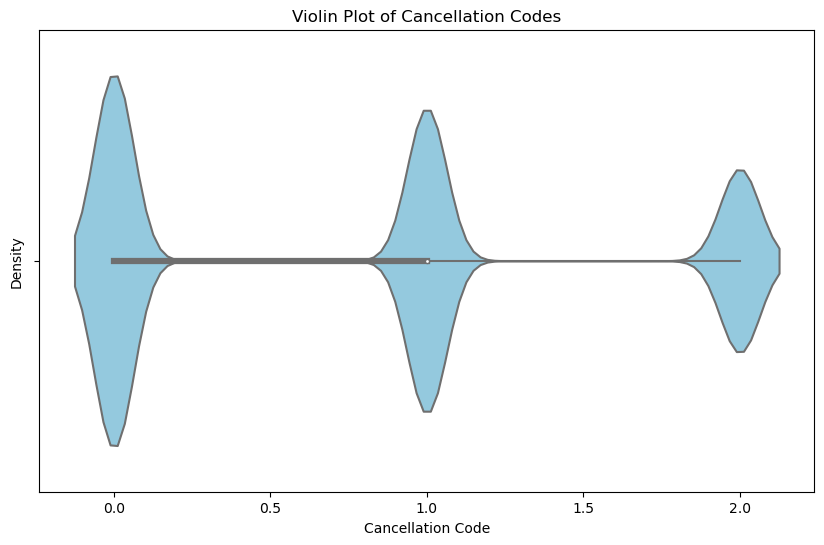

In [44]:
CanFlight__ = outcome_dataset[outcome_dataset['Flight_Outcome'] == 4]
# Filtering canceled flights
plt.figure(figsize=(10, 6))
sns.violinplot(x='CancellationCode', data=CanFlight__, color='skyblue')
plt.title('Violin Plot of Cancellation Codes')
plt.xlabel('Cancellation Code')
plt.ylabel('Density')
plt.show()

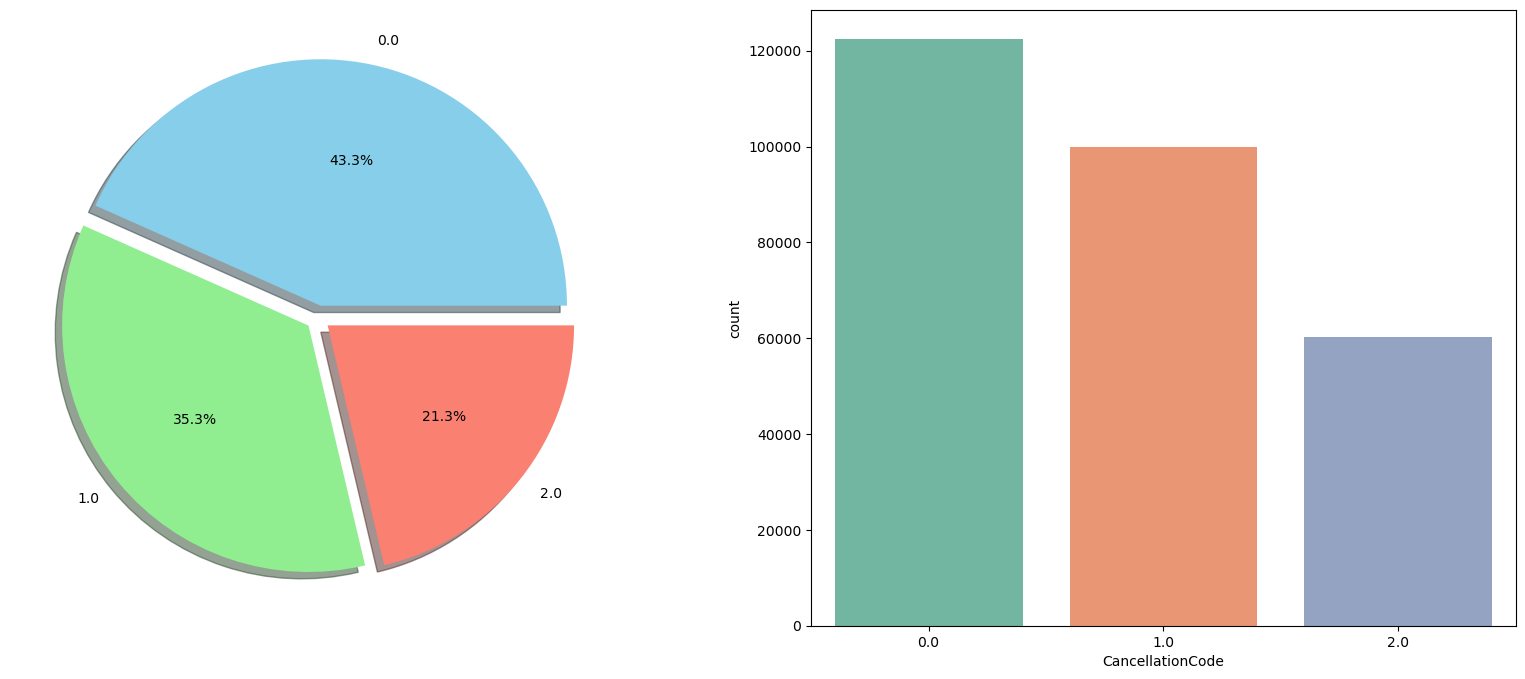

In [46]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
CanFlight__['CancellationCode'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['skyblue', 'lightgreen', 'salmon'])
ax[0].set_ylabel('')
sns.countplot(x='CancellationCode', order=CanFlight__['CancellationCode'].value_counts().index, data=CanFlight__, ax=ax[1], palette='Set2')
plt.show()

0 = carrier, 1 = weather, 2 = NAS

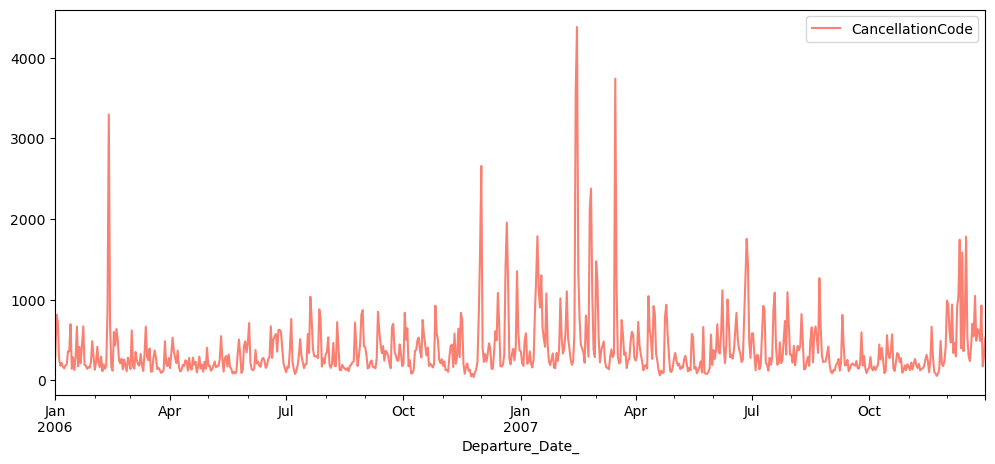

In [47]:
CanFlight__[['Departure_Date_', 'CancellationCode']].groupby(['Departure_Date_']).count().plot(figsize=(12, 5), color='salmon')
plt.show()

### (iii) Diverted Flights EDA

In [48]:
div_flights = outcome_dataset[outcome_dataset['Flight_Outcome'] == 4]  
not_div_flights = outcome_dataset[outcome_dataset['Flight_Outcome'] != 4]  
# Filtering for diverted and not diverted flights
div_flights_count = div_flights.shape[0]
not_div_flights_count = not_div_flights.shape[0]
print("Number of diverted flights:", div_flights_count)
print("Number of not diverted flights:", not_div_flights_count)
# Geting the count of diverted and not diverted flights

Number of diverted flights: 282682
Number of not diverted flights: 14312421


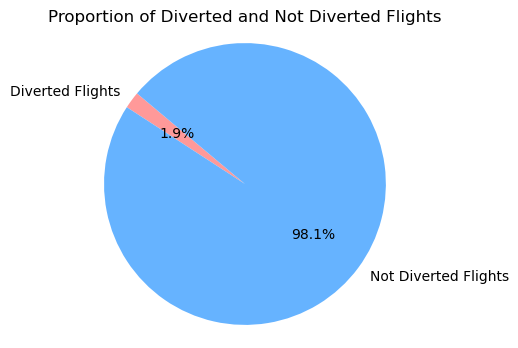

In [49]:
labels = ['Diverted Flights', 'Not Diverted Flights']
sizes = [div_flights_count, not_div_flights_count]
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Diverted and Not Diverted Flights')
plt.axis('equal')  
plt.show()
#Visualing the imabalance between the diverted and not diverted flights

- Diverted flights for the dataset is extremely low so the dataset needs to be balanced before it is analysed which will be done in part (c) of the question.